In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

from nltk.stem import PorterStemmer


stop_words = stopwords.words()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
with open('/content/drive/MyDrive/ColabNotebooks/airline.csv', encoding='utf-8', errors='ignore') as file:
    data = pd.read_csv(file)
data.head(20)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
5,681448162,False,finalized,3,2/25/15 9:10,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
6,681448165,False,finalized,3,2/25/15 8:11,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/15 11:13,5.703010e+17,San Francisco CA,Pacific Time (US & Canada)
7,681448167,False,finalized,3,2/25/15 2:11,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2/24/15 11:12,5.703000e+17,Los Angeles,Pacific Time (US & Canada)
8,681448169,False,finalized,3,2/25/15 9:01,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't_but NOW I DO! :-D",NaN,2/24/15 11:11,5.703000e+17,San Diego,Pacific Time (US & Canada)
9,681448171,False,finalized,3,2/25/15 4:15,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2/24/15 10:53,5.702950e+17,Los Angeles,Eastern Time (US & Canada)


In [40]:

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [41]:
def preprocess_text(text):
    # Remove URLs and non-alphanumeric characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    # Remove stop words and stem the words
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
data['text'] = data['text'].apply(preprocess_text)

In [43]:
data.rename(columns={'airline_sentiment':'sentiment'}, inplace = True)
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,virginamerica dhepburn said,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica plu youv ad commerci experi tacki,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,virginamerica didnt today must mean need take ...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,virginamerica realli aggress blast obnoxi ente...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,virginamerica realli big bad thing,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,681679794,False,finalized,3,2/25/15 19:46,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,americanair thank got differ flight chicago,NaN,2/22/15 12:01,5.695880e+17,NaN,NaN
14636,681679795,False,finalized,3,2/25/15 19:14,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,americanair leav minut late flight warn commun...,NaN,2/22/15 11:59,5.695870e+17,Texas,NaN
14637,681679796,False,finalized,3,2/25/15 19:04,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,americanair pleas bring american airlin blackb...,NaN,2/22/15 11:59,5.695870e+17,"Nigeria,lagos",NaN
14638,681679797,False,finalized,3,2/25/15 18:59,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,americanair money chang flight dont answer pho...,NaN,2/22/15 11:59,5.695870e+17,New Jersey,Eastern Time (US & Canada)


In [44]:
data['sentiment'].value_counts()

,count
sentiment,
negative,9178
neutral,3099
positive,2363


<Axes: >

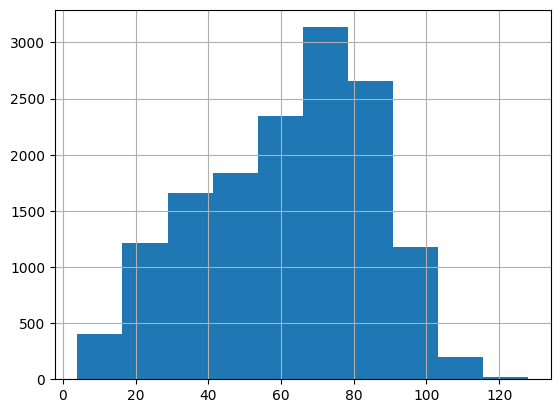

In [45]:
data['text'].str.len().hist()


Text(0.5, 1.0, 'Negative Tweets')

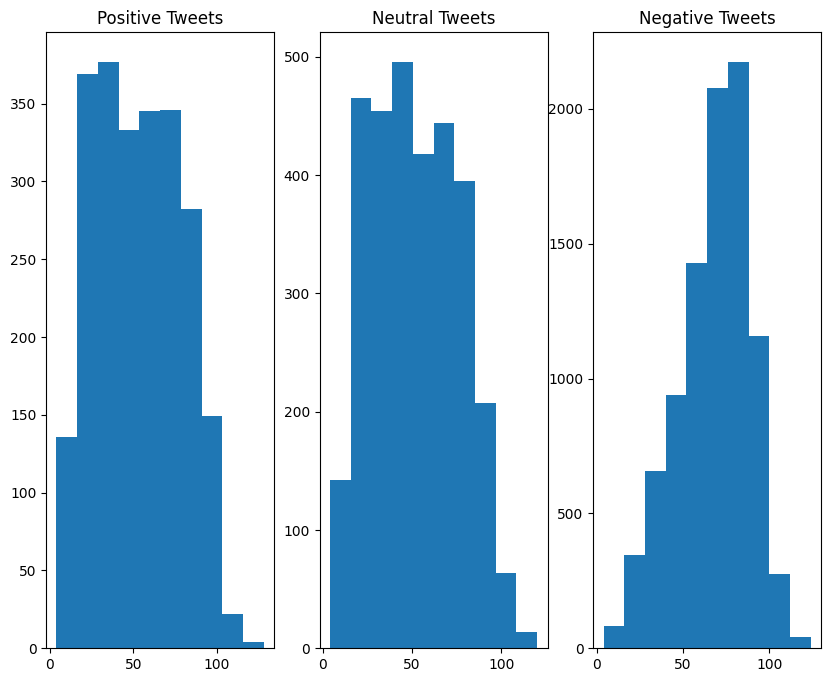

In [46]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,8))
ax1.hist(data[data['sentiment']=='positive']['text'].str.len())
ax1.set_title( 'Positive Tweets')
ax2.hist(data[data['sentiment']=='neutral']['text'].str.len())
ax2.set_title( 'Neutral Tweets')
ax3.hist(data[data['sentiment']=='negative']['text'].str.len())
ax3.set_title( 'Negative Tweets')

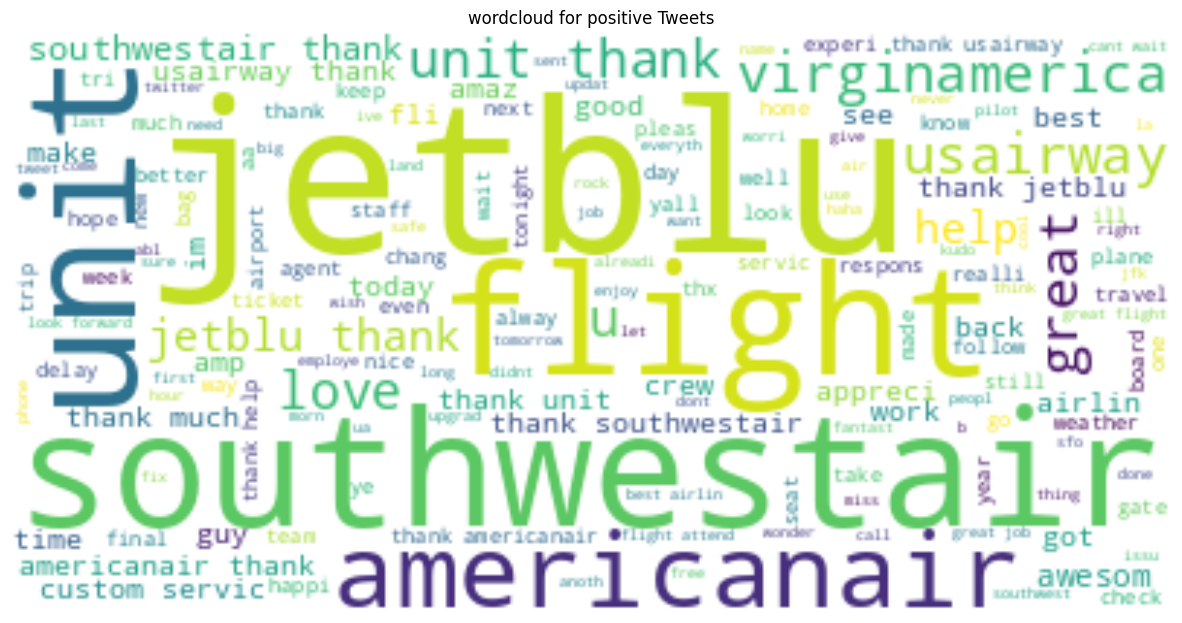

In [47]:
text = " ".join(i for i in data[data['sentiment']=='positive']['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive Tweets')
plt.show()

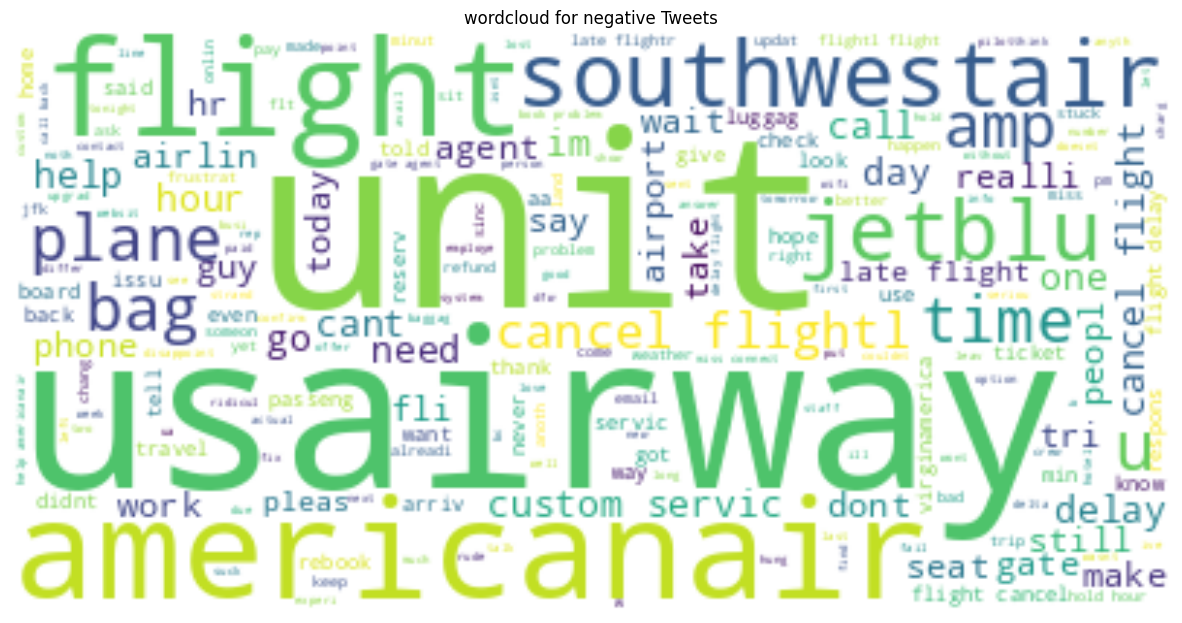

In [48]:
text = " ".join(i for i in data[data['sentiment']=='negative']['text'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative Tweets')
plt.show()

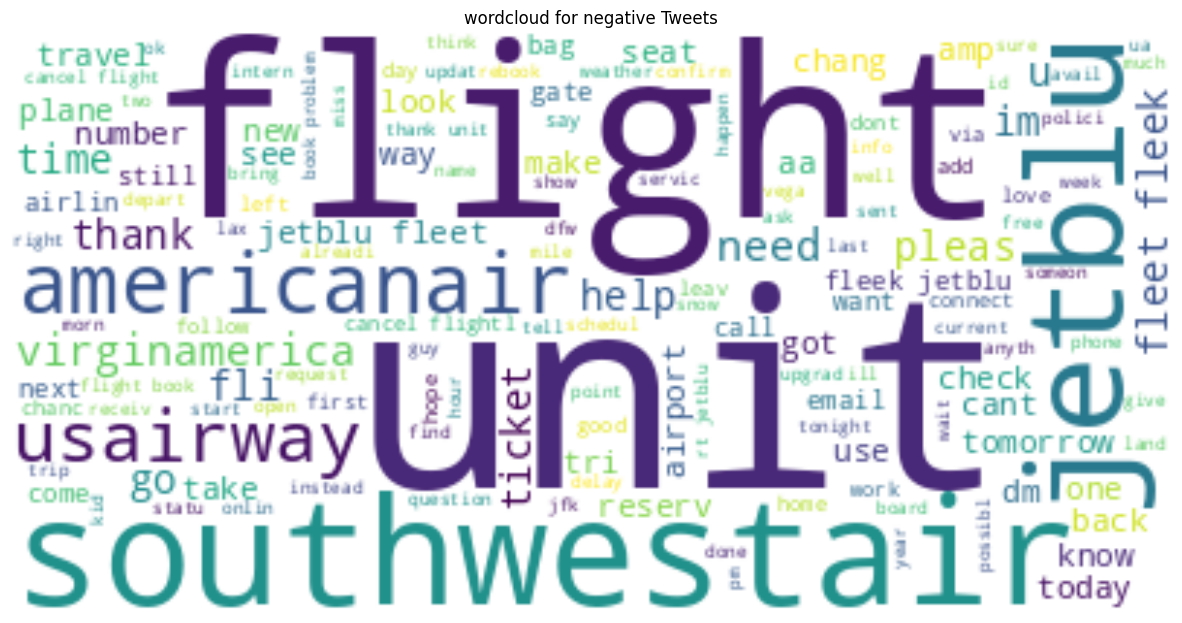

In [49]:
text = " ".join(i for i in data[data['sentiment']=='neutral']['text'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for neutral Tweets')
plt.show()

In [67]:
dt = data['text']
dt = pd.DataFrame(dt)
dt['sentiment']=data['sentiment']
dt

,text,sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plu youv ad commerci experi tacki,positive
2,virginamerica didnt today must mean need take ...,neutral
3,virginamerica realli aggress blast obnoxi ente...,negative
4,virginamerica realli big bad thing,negative
...,...,...
14635,americanair thank got differ flight chicago,positive
14636,americanair leav minut late flight warn commun...,negative
14637,americanair pleas bring american airlin blackb...,neutral
14638,americanair money chang flight dont answer pho...,negative


In [68]:
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [69]:
dt

,text,sentiment,no_sw
0,virginamerica dhepburn said,neutral,virginamerica dhepburn said
1,virginamerica plu youv ad commerci experi tacki,positive,virginamerica plu youv ad commerci experi tacki
2,virginamerica didnt today must mean need take ...,neutral,virginamerica didnt today must mean need take ...
3,virginamerica realli aggress blast obnoxi ente...,negative,virginamerica realli aggress blast obnoxi ente...
4,virginamerica realli big bad thing,negative,virginamerica realli big bad thing
...,...,...,...
14635,americanair thank got differ flight chicago,positive,americanair thank got differ flight chicago
14636,americanair leav minut late flight warn commun...,negative,americanair leav minut late flight warn commun...
14637,americanair pleas bring american airlin blackb...,neutral,americanair pleas bring american airlin blackb...
14638,americanair money chang flight dont answer pho...,negative,americanair money chang flight dont answer pho...


In [70]:

cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,flight,4808
1,unit,4152
2,usairway,3052
3,americanair,2958
4,southwestair,2456
5,jetblu,2391
6,thank,1689
7,get,1617
8,hour,1151
9,cancel,1056


In [71]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)

In [72]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,text,sentiment,no_sw,wo_stopfreq
0,virginamerica dhepburn said,neutral,virginamerica dhepburn said,virginamerica dhepburn said
1,virginamerica plu youv ad commerci experi tacki,positive,virginamerica plu youv ad commerci experi tacki,virginamerica plu youv ad commerci experi tacki
2,virginamerica didnt today must mean need take ...,neutral,virginamerica didnt today must mean need take ...,virginamerica didnt today must mean need take ...
3,virginamerica realli aggress blast obnoxi ente...,negative,virginamerica realli aggress blast obnoxi ente...,virginamerica realli aggress blast obnoxi ente...
4,virginamerica realli big bad thing,negative,virginamerica realli big bad thing,virginamerica realli big bad thing


In [73]:


#TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['sentiment']

In [74]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,virginamerica dhepburn said,neutral,virginamerica dhepburn said,virginamerica dhepburn said,virginamerica dhepburn said
1,virginamerica plu youv ad commerci experi tacki,positive,virginamerica plu youv ad commerci experi tacki,virginamerica plu youv ad commerci experi tacki,virginamerica plu youv ad commerci experi tacki
2,virginamerica didnt today must mean need take ...,neutral,virginamerica didnt today must mean need take ...,virginamerica didnt today must mean need take ...,virginamerica didnt today must mean need take ...
3,virginamerica realli aggress blast obnoxi ente...,negative,virginamerica realli aggress blast obnoxi ente...,virginamerica realli aggress blast obnoxi ente...,virginamerica realli aggress blast obnoxi ente...
4,virginamerica realli big bad thing,negative,virginamerica realli big bad thing,virginamerica realli big bad thing,virginamerica realli big bad thing
...,...,...,...,...,...
14635,americanair thank got differ flight chicago,positive,americanair thank got differ flight chicago,got differ chicago,got differ chicago
14636,americanair leav minut late flight warn commun...,negative,americanair leav minut late flight warn commun...,leav minut late warn commun minut late call sh...,leav minut late warn commun minut late call sh...
14637,americanair pleas bring american airlin blackb...,neutral,americanair pleas bring american airlin blackb...,pleas bring american airlin blackberri,pleas bring american airlin blackberri
14638,americanair money chang flight dont answer pho...,negative,americanair money chang flight dont answer pho...,money chang dont answer phone suggest make commit,money chang dont answer phone suggest make commit


In [75]:
mapping = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}


In [76]:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','text']

# Apply the mapping to the 'sentiment' column
nb['sentiment'] = nb['sentiment'].map(mapping)


nb

,sentiment,text
0,1,virginamerica dhepburn said
1,2,virginamerica plu youv ad commerci experi tacki
2,1,virginamerica didnt today must mean need take ...
3,0,virginamerica realli aggress blast obnoxi ente...
4,0,virginamerica realli big bad thing
...,...,...
14635,2,got differ chicago
14636,0,leav minut late warn commun minut late call sh...
14637,1,pleas bring american airlin blackberri
14638,0,money chang dont answer phone suggest make commit


In [77]:
tokenized_review=nb['text'].apply(lambda x: x.split())
tokenized_review.head(5)

,text
0,"[virginamerica, dhepburn, said]"
1,"[virginamerica, plu, youv, ad, commerci, exper..."
2,"[virginamerica, didnt, today, must, mean, need..."
3,"[virginamerica, realli, aggress, blast, obnoxi..."
4,"[virginamerica, realli, big, bad, thing]"


In [78]:

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [79]:

X=text_counts
y=nb['sentiment']


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [86]:

CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 74.80%
------------------------------------------------
Confusion Matrix:
      0    1    2
0  1640  134  115
1   211  274   95
2   125   58  276
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1889
           1       0.59      0.47      0.52       580
           2       0.57      0.60      0.58       459

    accuracy                           0.75      2928
   macro avg       0.66      0.65      0.65      2928
weighted avg       0.74      0.75      0.74      2928



In [89]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate our model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.764344262295082
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1889
           1       0.57      0.54      0.55       580
           2       0.65      0.55      0.60       459

    accuracy                           0.76      2928
   macro avg       0.69      0.66      0.67      2928
weighted avg       0.76      0.76      0.76      2928



In [92]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 75.24%
------------------------------------------------
Confusion Matrix:
      0    1    2
0  1766   77   46
1   312  224   44
2   204   42  213
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.85      1889
           1       0.65      0.39      0.49       580
           2       0.70      0.46      0.56       459

    accuracy                           0.75      2928
   macro avg       0.71      0.60      0.63      2928
weighted avg       0.74      0.75      0.73      2928

